In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

StatementMeta(, 33576bbf-4e6a-43c9-a890-7749b66a7a2b, 3, Finished, Available, Finished)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

StatementMeta(, 33576bbf-4e6a-43c9-a890-7749b66a7a2b, 4, Finished, Available, Finished)

In [3]:
# Load data into pandas DataFrame from "/lakehouse/default/Files/Uber_csv/uber_transactions_extracted.csv"
df = pd.read_csv("/lakehouse/default/Files/Uber_csv/uber_transactions_extracted.csv")
display(df)


StatementMeta(, 33576bbf-4e6a-43c9-a890-7749b66a7a2b, 5, Finished, Available, Finished)

SynapseWidget(Synapse.DataFrame, c2148c0d-24b0-42ef-ab1a-fd0516f98b64)

In [4]:
df.info()

StatementMeta(, 33576bbf-4e6a-43c9-a890-7749b66a7a2b, 6, Finished, Available, Finished)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4390 entries, 0 to 4389
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Event               4390 non-null   object 
 1   Your earnings       4390 non-null   float64
 2   Refunds & Expenses  4390 non-null   float64
 3   Balance             4390 non-null   float64
 4   Processed_Date      4390 non-null   object 
 5   Year                4390 non-null   int64  
 6   Month               4390 non-null   object 
 7   Weekday             4390 non-null   object 
dtypes: float64(3), int64(1), object(4)
memory usage: 274.5+ KB


In [5]:
df = df.sort_values("Processed_Date")

StatementMeta(, 33576bbf-4e6a-43c9-a890-7749b66a7a2b, 7, Finished, Available, Finished)

In [6]:
df['Processed_Date'] = pd.to_datetime(df['Processed_Date'])
df.info()

StatementMeta(, 33576bbf-4e6a-43c9-a890-7749b66a7a2b, 8, Finished, Available, Finished)

<class 'pandas.core.frame.DataFrame'>
Index: 4390 entries, 94 to 4341
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Event               4390 non-null   object        
 1   Your earnings       4390 non-null   float64       
 2   Refunds & Expenses  4390 non-null   float64       
 3   Balance             4390 non-null   float64       
 4   Processed_Date      4390 non-null   datetime64[ns]
 5   Year                4390 non-null   int64         
 6   Month               4390 non-null   object        
 7   Weekday             4390 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(3)
memory usage: 308.7+ KB


In [7]:
df.head(10)

StatementMeta(, 33576bbf-4e6a-43c9-a890-7749b66a7a2b, 9, Finished, Available, Finished)

,Event,Your earnings,Refunds & Expenses,Balance,Processed_Date,Year,Month,Weekday
94,UberX,3.65,0.88,4.53,2024-01-03,2024,January,Wednesday
88,UberX,6.16,1.34,7.50,2024-01-03,2024,January,Wednesday
78,UberX,23.17,5.32,28.49,2024-01-03,2024,January,Wednesday
89,UberX,4.70,1.07,5.77,2024-01-03,2024,January,Wednesday
90,UberX,3.14,0.78,3.92,2024-01-03,2024,January,Wednesday
91,UberX,3.94,0.93,4.87,2024-01-03,2024,January,Wednesday
92,UberX,12.65,2.56,15.21,2024-01-03,2024,January,Wednesday
93,UberX,21.35,4.66,26.01,2024-01-03,2024,January,Wednesday
95,Tips,5.00,0.00,5.00,2024-01-03,2024,January,Wednesday
96,UberX,6.79,1.46,8.25,2024-01-03,2024,January,Wednesday


In [8]:
df.tail(10)

StatementMeta(, 33576bbf-4e6a-43c9-a890-7749b66a7a2b, 10, Finished, Available, Finished)

,Event,Your earnings,Refunds & Expenses,Balance,Processed_Date,Year,Month,Weekday
4308,UberX,17.93,14.88,32.81,2025-06-08,2025,June,Sunday
4306,Tips,3.00,0.00,3.00,2025-06-08,2025,June,Sunday
4305,UberX,9.18,1.91,11.09,2025-06-08,2025,June,Sunday
4304,UberX,5.58,1.35,6.93,2025-06-08,2025,June,Sunday
4303,UberX,11.29,2.54,13.83,2025-06-08,2025,June,Sunday
4300,UberX,4.30,0.76,5.06,2025-06-08,2025,June,Sunday
4312,UberX,7.45,1.43,8.88,2025-06-08,2025,June,Sunday
4283,UberX,14.75,3.46,18.21,2025-06-08,2025,June,Sunday
4313,UberX,3.68,0.83,4.51,2025-06-08,2025,June,Sunday
4341,Tips,1.00,0.00,1.00,2025-06-09,2025,June,Monday


In [9]:
df.drop(columns='Processed_Date').describe().T

StatementMeta(, 33576bbf-4e6a-43c9-a890-7749b66a7a2b, 11, Finished, Available, Finished)

,count,mean,std,min,25%,50%,75%,max
Your earnings,4390.0,9.399125,7.345947,0.66,4.8825,7.08,11.5875,95.25
Refunds & Expenses,4390.0,1.945736,1.955947,0.00,1.0300,1.53,2.4100,29.16
Balance,4390.0,11.344861,9.093916,0.66,5.7000,8.55,13.9675,111.52
Year,4390.0,2024.223235,0.416462,2024.00,2024.0000,2024.00,2024.0000,2025.00


## TIME ANALYSIS


### Total earnings Monthly

StatementMeta(, 33576bbf-4e6a-43c9-a890-7749b66a7a2b, 14, Finished, Available, Finished)

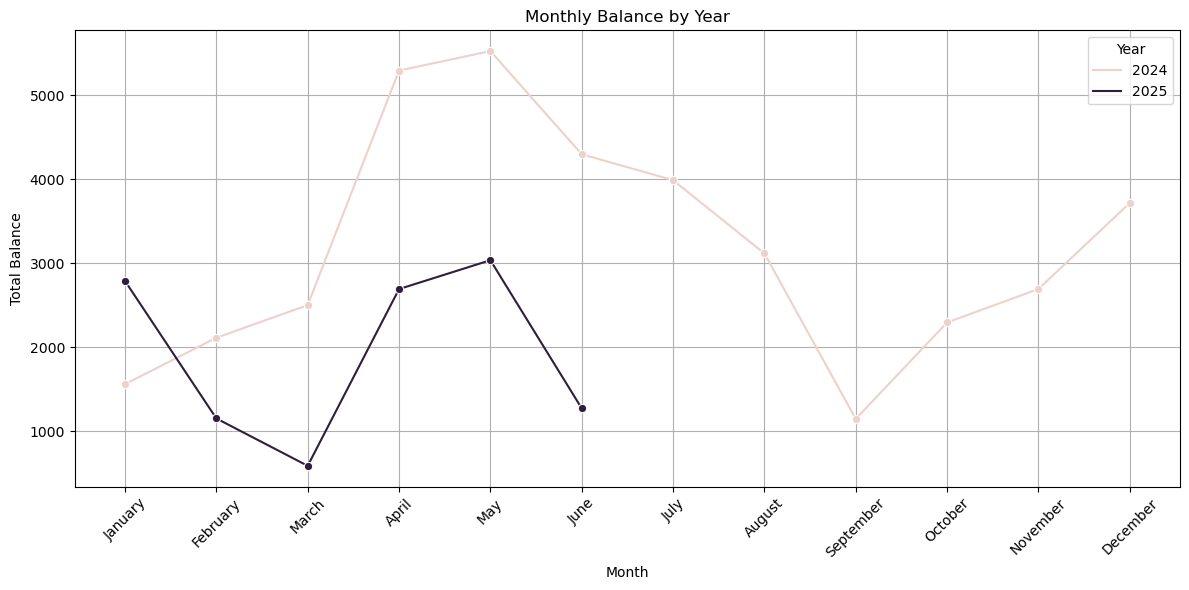

In [12]:
monthly_summary = df.groupby(
    [df['Processed_Date'].dt.year.rename('Year'), 
     df['Processed_Date'].dt.month_name().rename('Month')]
).agg({
    'Balance': 'sum'
}).reset_index()

# Optional: Sort by Year and Month in calendar order
month_order = ["January", "February", "March", "April", "May", "June", 
               "July", "August", "September", "October", "November", "December"]
monthly_summary['Month'] = pd.Categorical(monthly_summary['Month'], categories=month_order, ordered=True)
monthly_summary = monthly_summary.sort_values(['Year', 'Month']).reset_index(drop=True)

monthly_summary

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_summary, x='Month', y='Balance', hue='Year', marker='o')

plt.title('Monthly Balance by Year')
plt.xlabel('Month')
plt.ylabel('Total Balance')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [13]:
monthly_summary = df.groupby(
    [df['Processed_Date'].dt.year.rename('Year'),
     df['Processed_Date'].dt.month_name().rename('Month')]
).agg(
    Total_Balance=('Balance', 'sum'),
    Average_Balance=('Balance', 'mean'),
    Transaction_Count=('Balance', 'count')
).reset_index()
monthly_summary 


StatementMeta(, 33576bbf-4e6a-43c9-a890-7749b66a7a2b, 15, Finished, Available, Finished)

,Year,Month,Total_Balance,Average_Balance,Transaction_Count
0,2024,April,5295.21,10.895494,486
1,2024,August,3117.83,10.825799,288
2,2024,December,3718.47,11.842261,314
3,2024,February,2114.15,10.623869,199
4,2024,January,1561.85,11.076950,141
5,2024,July,3990.33,10.932411,365
6,2024,June,4299.21,10.856591,396
7,2024,March,2502.51,11.323575,221
8,2024,May,5527.47,11.938380,463
9,2024,November,2694.66,11.227750,240


#### Yearly Summary 


In [14]:
yearly_summary = monthly_summary.groupby('Year').agg(
    Total_Balance_Sum=('Total_Balance', 'sum'),
    Average_Balance_Mean=('Average_Balance', 'mean'),
    Transaction_Count_Sum=('Transaction_Count', 'sum')
).reset_index()

yearly_summary


StatementMeta(, 33576bbf-4e6a-43c9-a890-7749b66a7a2b, 16, Finished, Available, Finished)

,Year,Total_Balance_Sum,Average_Balance_Mean,Transaction_Count_Sum
0,2024,38265.71,11.188117,3410
1,2025,11538.23,11.698168,980


#### Quarterly_summary

StatementMeta(, 33576bbf-4e6a-43c9-a890-7749b66a7a2b, 17, Finished, Available, Finished)

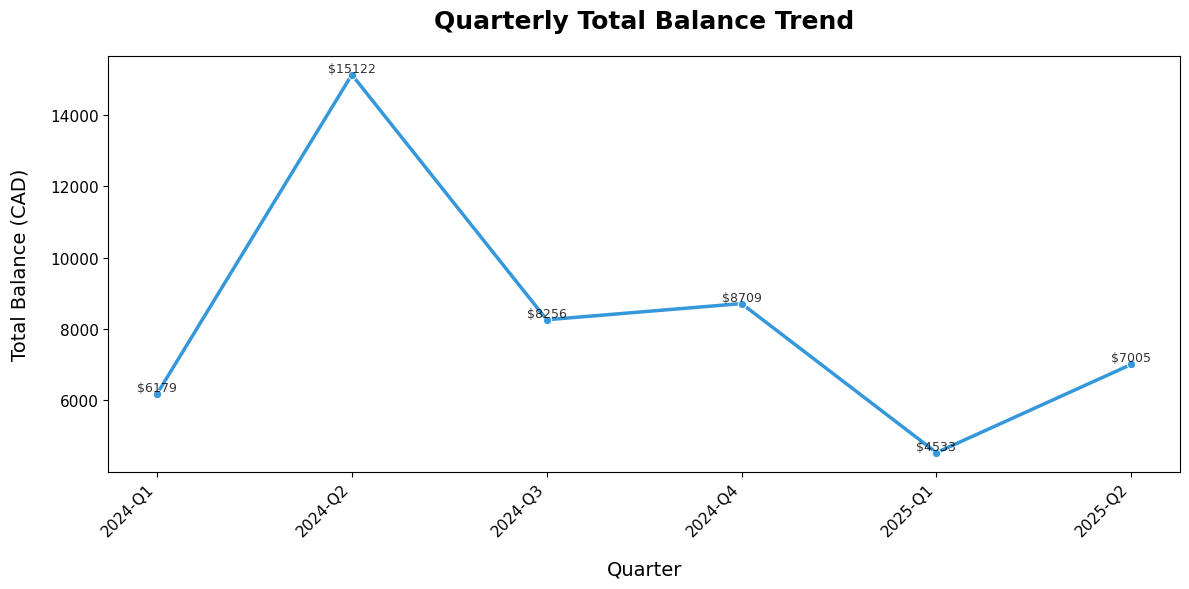

In [15]:
# Group data by Year and Quarter, aggregate sum of Balance
quarterly_summary = df.groupby([
    df['Processed_Date'].dt.year.rename('Year'),
    df['Processed_Date'].dt.quarter.rename('Quarter')
]).agg(
    Total_Balance=('Balance', 'sum')
).reset_index()

# Sort data chronologically
quarterly_summary = quarterly_summary.sort_values(['Year', 'Quarter']).reset_index(drop=True)

# Create Year-Quarter label (e.g., '2024-Q1')
quarterly_summary['YearQuarter'] = quarterly_summary['Year'].astype(str) + '-Q' + quarterly_summary['Quarter'].astype(str)

# Plotting
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=quarterly_summary,
    x='YearQuarter',
    y='Total_Balance',
    marker='o',
    color='#3498db',
    linewidth=2.5
)

plt.title('Quarterly Total Balance Trend', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Quarter', fontsize=14, labelpad=15)
plt.ylabel('Total Balance (CAD)', fontsize=14, labelpad=15)
plt.xticks(rotation=45, ha='right', fontsize=11)
plt.yticks(fontsize=11)

# Add value labels on each point
for i, row in quarterly_summary.iterrows():
    plt.text(row['YearQuarter'], row['Total_Balance'], f'${row["Total_Balance"]:.0f}',
             ha='center', va='bottom', fontsize=9, color='black', alpha=0.8)

plt.tight_layout()
plt.show()

#### #### Weekly Summary Calculation (only Total_Balance)

StatementMeta(, 33576bbf-4e6a-43c9-a890-7749b66a7a2b, 18, Finished, Available, Finished)

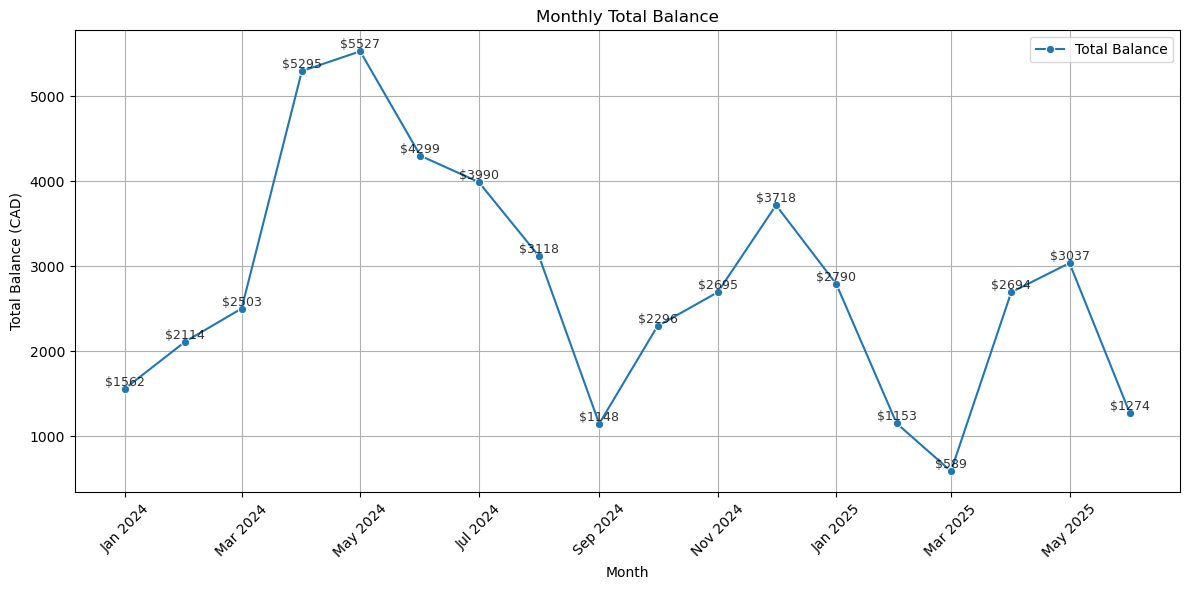

In [16]:
# Group data by Year and Month
monthly_summary = df.groupby(
    [df['Processed_Date'].dt.year.rename('Year'),
     df['Processed_Date'].dt.month_name().rename('Month')]
).agg(
    Total_Balance=('Balance', 'sum'),
    Transaction_Count=('Balance', 'count')
).reset_index()

# Convert Month name to month number
monthly_summary['Month_Num'] = pd.to_datetime(monthly_summary['Month'], format='%B').dt.month

# Create a proper datetime column for plotting
monthly_summary['Date'] = pd.to_datetime(
    monthly_summary['Year'].astype(str) + '-' + monthly_summary['Month_Num'].astype(str) + '-01'
)

# Sort by date for correct order on the plot
monthly_summary.sort_values('Date', inplace=True)

# Plotting the Total Balance over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_summary, x='Date', y='Total_Balance', marker='o', label='Total Balance')

# Format x-axis with month-year labels
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

# Labels and styling
plt.title('Monthly Total Balance')
plt.xlabel('Month')
plt.ylabel('Total Balance (CAD)')
plt.grid(True)  # Remove or comment this line if you want no grid
plt.xticks(rotation=45)
plt.legend()

# Add value labels on each data point
for i, row in monthly_summary.iterrows():
    plt.text(row['Date'], row['Total_Balance'], f'${row["Total_Balance"]:.0f}',
             ha='center', va='bottom', fontsize=9, color='black', alpha=0.8)

plt.tight_layout()
plt.show()

 #### 

In [17]:
day_summary = df.groupby('Weekday').agg({
    'Your earnings': 'mean',
    'Refunds & Expenses': 'mean',
    'Balance': 'mean'
}).reset_index()
day_summary

StatementMeta(, 33576bbf-4e6a-43c9-a890-7749b66a7a2b, 19, Finished, Available, Finished)

,Weekday,Your earnings,Refunds & Expenses,Balance
0,Friday,9.395983,1.935607,11.331590
1,Monday,9.554045,2.063308,11.617353
2,Saturday,9.407331,1.907500,11.314831
3,Sunday,9.403684,1.902990,11.306675
4,Thursday,9.287390,1.950718,11.238108
5,Tuesday,9.708561,1.998417,11.706978
6,Wednesday,9.116672,1.879477,10.996149


# Distribution of Earnings

StatementMeta(, 33576bbf-4e6a-43c9-a890-7749b66a7a2b, 20, Finished, Available, Finished)

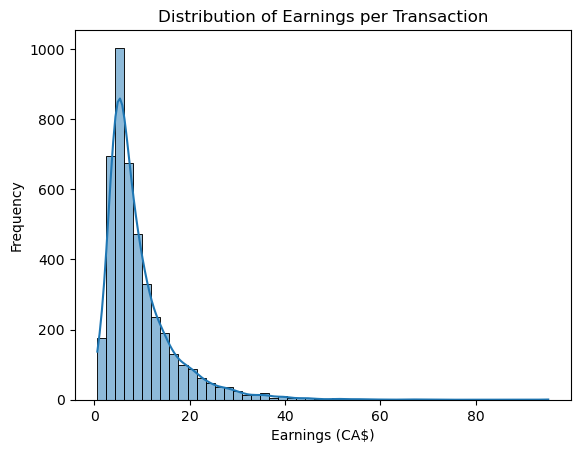

In [18]:
sns.histplot(df['Your earnings'], bins=50, kde=True)
plt.title("Distribution of Earnings per Transaction")
plt.xlabel("Earnings (CA$)")
plt.ylabel("Frequency")
plt.show()

StatementMeta(, 33576bbf-4e6a-43c9-a890-7749b66a7a2b, 21, Finished, Available, Finished)

Text(0.5, 1.0, 'Earnings vsBalance')

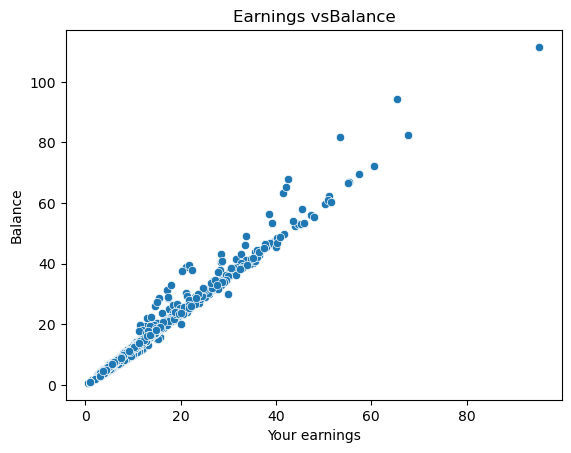

In [19]:
sns.scatterplot(data=df, x='Your earnings', y='Balance')
plt.title("Earnings vsBalance")

StatementMeta(, 33576bbf-4e6a-43c9-a890-7749b66a7a2b, 22, Finished, Available, Finished)

Text(0.5, 1.0, 'Earnings vs Refunds & Expenses')

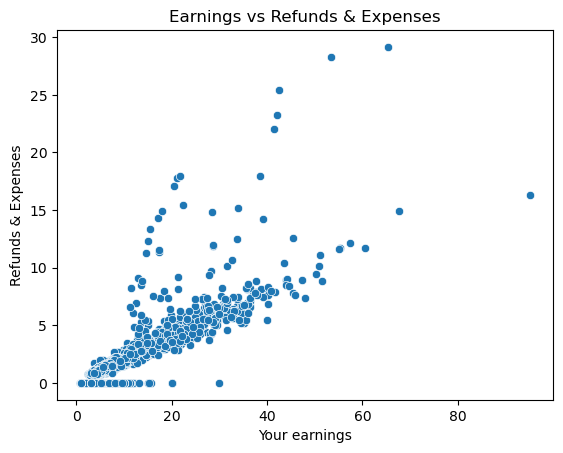

In [20]:
sns.scatterplot(data=df, x='Your earnings', y='Refunds & Expenses')
plt.title("Earnings vs Refunds & Expenses")

StatementMeta(, 33576bbf-4e6a-43c9-a890-7749b66a7a2b, 23, Finished, Available, Finished)

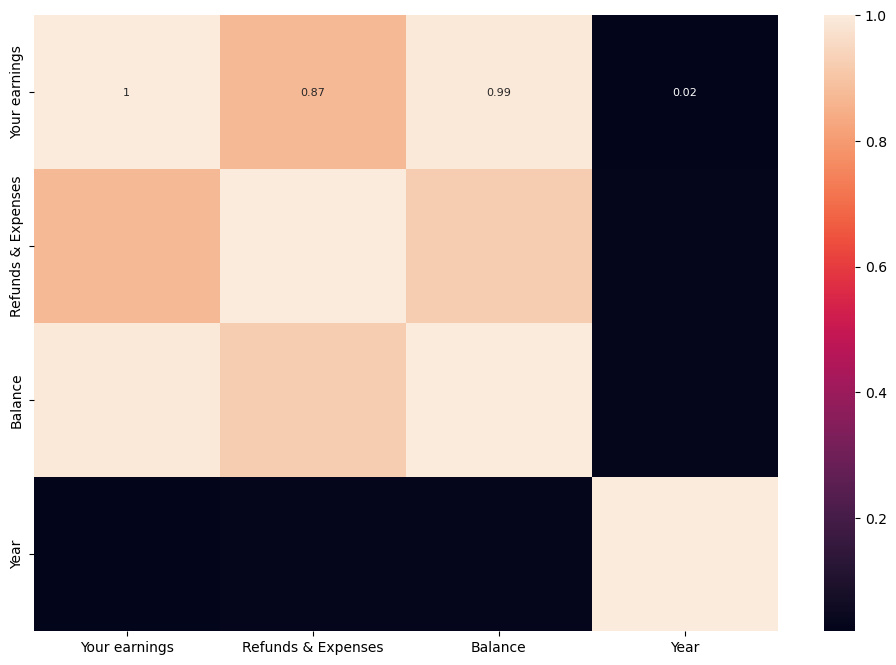

In [21]:
plt.figure(figsize=(12, 8))
sns.heatmap(
    round(df.corr(numeric_only=True), 2),
    annot=True,
    annot_kws={'size': 8}
)
plt.show()

In [22]:
df

StatementMeta(, 33576bbf-4e6a-43c9-a890-7749b66a7a2b, 24, Finished, Available, Finished)

,Event,Your earnings,Refunds & Expenses,Balance,Processed_Date,Year,Month,Weekday
94,UberX,3.65,0.88,4.53,2024-01-03,2024,January,Wednesday
88,UberX,6.16,1.34,7.50,2024-01-03,2024,January,Wednesday
78,UberX,23.17,5.32,28.49,2024-01-03,2024,January,Wednesday
89,UberX,4.70,1.07,5.77,2024-01-03,2024,January,Wednesday
90,UberX,3.14,0.78,3.92,2024-01-03,2024,January,Wednesday
...,...,...,...,...,...,...,...,...
4300,UberX,4.30,0.76,5.06,2025-06-08,2025,June,Sunday
4312,UberX,7.45,1.43,8.88,2025-06-08,2025,June,Sunday
4283,UberX,14.75,3.46,18.21,2025-06-08,2025,June,Sunday
4313,UberX,3.68,0.83,4.51,2025-06-08,2025,June,Sunday


#### ****Feature Engineering****

In [23]:
df2 = df.drop('Processed_Date', axis = 1)
df2

StatementMeta(, 33576bbf-4e6a-43c9-a890-7749b66a7a2b, 25, Finished, Available, Finished)

,Event,Your earnings,Refunds & Expenses,Balance,Year,Month,Weekday
94,UberX,3.65,0.88,4.53,2024,January,Wednesday
88,UberX,6.16,1.34,7.50,2024,January,Wednesday
78,UberX,23.17,5.32,28.49,2024,January,Wednesday
89,UberX,4.70,1.07,5.77,2024,January,Wednesday
90,UberX,3.14,0.78,3.92,2024,January,Wednesday
...,...,...,...,...,...,...,...
4300,UberX,4.30,0.76,5.06,2025,June,Sunday
4312,UberX,7.45,1.43,8.88,2025,June,Sunday
4283,UberX,14.75,3.46,18.21,2025,June,Sunday
4313,UberX,3.68,0.83,4.51,2025,June,Sunday


In [24]:
df2['Net_Earnings'] = df2['Your earnings'] - df2['Refunds & Expenses']
df2

StatementMeta(, 33576bbf-4e6a-43c9-a890-7749b66a7a2b, 26, Finished, Available, Finished)

,Event,Your earnings,Refunds & Expenses,Balance,Year,Month,Weekday,Net_Earnings
94,UberX,3.65,0.88,4.53,2024,January,Wednesday,2.77
88,UberX,6.16,1.34,7.50,2024,January,Wednesday,4.82
78,UberX,23.17,5.32,28.49,2024,January,Wednesday,17.85
89,UberX,4.70,1.07,5.77,2024,January,Wednesday,3.63
90,UberX,3.14,0.78,3.92,2024,January,Wednesday,2.36
...,...,...,...,...,...,...,...,...
4300,UberX,4.30,0.76,5.06,2025,June,Sunday,3.54
4312,UberX,7.45,1.43,8.88,2025,June,Sunday,6.02
4283,UberX,14.75,3.46,18.21,2025,June,Sunday,11.29
4313,UberX,3.68,0.83,4.51,2025,June,Sunday,2.85


In [25]:
df3 = df2.drop(['Net_Earnings', 'Your earnings', 'Refunds & Expenses', 'Year'],axis = 1)

StatementMeta(, 33576bbf-4e6a-43c9-a890-7749b66a7a2b, 27, Finished, Available, Finished)

In [26]:
df3

StatementMeta(, 33576bbf-4e6a-43c9-a890-7749b66a7a2b, 28, Finished, Available, Finished)

,Event,Balance,Month,Weekday
94,UberX,4.53,January,Wednesday
88,UberX,7.50,January,Wednesday
78,UberX,28.49,January,Wednesday
89,UberX,5.77,January,Wednesday
90,UberX,3.92,January,Wednesday
...,...,...,...,...
4300,UberX,5.06,June,Sunday
4312,UberX,8.88,June,Sunday
4283,UberX,18.21,June,Sunday
4313,UberX,4.51,June,Sunday


#### ****One-Hot Encoding****

In [27]:
categorical_cols = ['Event', 'Month', 'Weekday']
categorical_cols

StatementMeta(, 33576bbf-4e6a-43c9-a890-7749b66a7a2b, 29, Finished, Available, Finished)

['Event', 'Month', 'Weekday']


#### Apply one-hot encoding

In [28]:
df3 = pd.get_dummies(df3, columns=categorical_cols, drop_first=True)

StatementMeta(, 33576bbf-4e6a-43c9-a890-7749b66a7a2b, 30, Finished, Available, Finished)

In [41]:
df3 = df3.replace({True: 1, False: 0, 'True': 1, 'False': 0})

StatementMeta(, 33576bbf-4e6a-43c9-a890-7749b66a7a2b, 43, Finished, Available, Finished)

In [42]:
df3

StatementMeta(, 33576bbf-4e6a-43c9-a890-7749b66a7a2b, 44, Finished, Available, Finished)

,Balance,Event_Courier,Event_Tips,Event_UberX,Event_UberX Share,Month_August,Month_December,Month_February,Month_January,Month_July,...,Month_May,Month_November,Month_October,Month_September,Weekday_Monday,Weekday_Saturday,Weekday_Sunday,Weekday_Thursday,Weekday_Tuesday,Weekday_Wednesday
94,4.53,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
88,7.50,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
78,28.49,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
89,5.77,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
90,3.92,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4300,5.06,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4312,8.88,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4283,18.21,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4313,4.51,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [43]:
df3.columns

StatementMeta(, 33576bbf-4e6a-43c9-a890-7749b66a7a2b, 45, Finished, Available, Finished)

Index(['Balance', 'Event_Courier', 'Event_Tips', 'Event_UberX',
       'Event_UberX Share', 'Month_August', 'Month_December', 'Month_February',
       'Month_January', 'Month_July', 'Month_June', 'Month_March', 'Month_May',
       'Month_November', 'Month_October', 'Month_September', 'Weekday_Monday',
       'Weekday_Saturday', 'Weekday_Sunday', 'Weekday_Thursday',
       'Weekday_Tuesday', 'Weekday_Wednesday'],
      dtype='object')

# ****Extract dependent and independent variables****

In [44]:
x = df3
y = df2.Net_Earnings

StatementMeta(, 33576bbf-4e6a-43c9-a890-7749b66a7a2b, 46, Finished, Available, Finished)

In [45]:
x

StatementMeta(, 33576bbf-4e6a-43c9-a890-7749b66a7a2b, 47, Finished, Available, Finished)

,Balance,Event_Courier,Event_Tips,Event_UberX,Event_UberX Share,Month_August,Month_December,Month_February,Month_January,Month_July,...,Month_May,Month_November,Month_October,Month_September,Weekday_Monday,Weekday_Saturday,Weekday_Sunday,Weekday_Thursday,Weekday_Tuesday,Weekday_Wednesday
94,4.53,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
88,7.50,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
78,28.49,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
89,5.77,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
90,3.92,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4300,5.06,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4312,8.88,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4283,18.21,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4313,4.51,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [46]:
y

StatementMeta(, 33576bbf-4e6a-43c9-a890-7749b66a7a2b, 48, Finished, Available, Finished)

94       2.77
88       4.82
78      17.85
89       3.63
90       2.36
        ...  
4300     3.54
4312     6.02
4283    11.29
4313     2.85
4341     1.00
Name: Net_Earnings, Length: 4390, dtype: float64

In [47]:
x.shape, y.shape

StatementMeta(, 33576bbf-4e6a-43c9-a890-7749b66a7a2b, 49, Finished, Available, Finished)

((4390, 22), (4390,))

In [48]:
x.head()

StatementMeta(, 33576bbf-4e6a-43c9-a890-7749b66a7a2b, 50, Finished, Available, Finished)

,Balance,Event_Courier,Event_Tips,Event_UberX,Event_UberX Share,Month_August,Month_December,Month_February,Month_January,Month_July,...,Month_May,Month_November,Month_October,Month_September,Weekday_Monday,Weekday_Saturday,Weekday_Sunday,Weekday_Thursday,Weekday_Tuesday,Weekday_Wednesday
94,4.53,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
88,7.50,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
78,28.49,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
89,5.77,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
90,3.92,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [49]:
y[:5]

StatementMeta(, 33576bbf-4e6a-43c9-a890-7749b66a7a2b, 51, Finished, Available, Finished)

94     2.77
88     4.82
78    17.85
89     3.63
90     2.36
Name: Net_Earnings, dtype: float64

In [50]:
y.min(), y.max(), y.mean()

StatementMeta(, 33576bbf-4e6a-43c9-a890-7749b66a7a2b, 52, Finished, Available, Finished)

(0.66, 78.98, 7.453389521640091)

****Scatter Plot of Balance vs. Net Earnings****

StatementMeta(, 33576bbf-4e6a-43c9-a890-7749b66a7a2b, 53, Finished, Available, Finished)

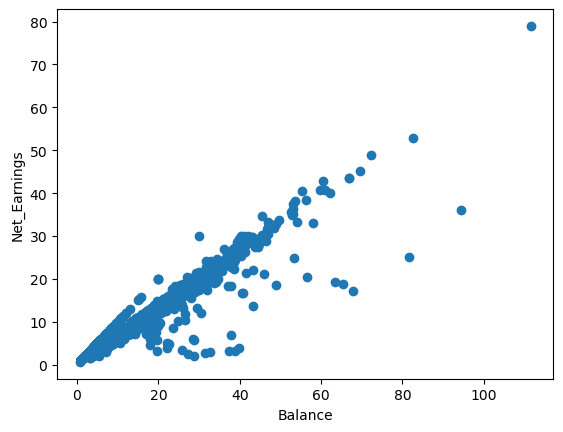

In [51]:
plt.scatter(df3.Balance, df2.Net_Earnings)
plt.xlabel('Balance')
plt.ylabel('Net_Earnings')
plt.show()

****Linear Relationship Between Balance and Net Earnings****

# ****Importing OLS statsmodel to check the p-values of the X variable****

In [52]:
import statsmodels.api as sm

StatementMeta(, 33576bbf-4e6a-43c9-a890-7749b66a7a2b, 54, Finished, Available, Finished)

In [53]:
X2 = sm.add_constant(x) #to account for b0
ols = sm.OLS(y,X2)
lr = ols.fit()
print(lr.summary())

StatementMeta(, 33576bbf-4e6a-43c9-a890-7749b66a7a2b, 55, Finished, Available, Finished)

                            OLS Regression Results                            
Dep. Variable:           Net_Earnings   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     2685.
Date:                Wed, 30 Jul 2025   Prob (F-statistic):               0.00
Time:                        22:33:44   Log-Likelihood:                -8021.5
No. Observations:                4390   AIC:                         1.609e+04
Df Residuals:                    4367   BIC:                         1.624e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.3380      0.14

In [54]:
lr.pvalues.max()

StatementMeta(, 33576bbf-4e6a-43c9-a890-7749b66a7a2b, 56, Finished, Available, Finished)

0.9918088659297115

<u></u>****Since p-values of some variable is higher than 0.05 (significance level) we have to apply Backward Feature Elimination****<u></u>

#### ****Backward Feature Elimination****
    Backward Feature Elimination starts with all features included in the model and iteratively removes the least significant feature one at a time. At each step, the model is re-evaluated, and the feature whose removal causes the smallest decrease (or the largest improvement) in model performance is eliminated. This process continues until a stopping criterion is met, such as a desired number of features or when all remaining features are statistically significant.

****Backward Elimination Using p-values
This loop performs backward elimination to improve the regression model by iteratively removing the variable with the highest p-value above 0.05. The process continues until all remaining variables are statistically significant. The final model summary is then printed.****


In [55]:
maxp = lr.pvalues.max()
while(maxp > 0.05):
    print(f"Adjuste R-Square is {lr.rsquared_adj}")
    print(f"{lr.pvalues.idxmax()} with p-value= {maxp} was dropped\n")
    X2.drop(lr.pvalues.idxmax(),axis=1,inplace=True) 
    ols = sm.OLS(y,X2)
    lr = ols.fit()
    maxp = lr.pvalues.max()
print(lr.summary())

StatementMeta(, 33576bbf-4e6a-43c9-a890-7749b66a7a2b, 57, Finished, Available, Finished)

Adjuste R-Square is 0.9308162063757348
Weekday_Saturday with p-value= 0.9918088659297115 was dropped



Adjuste R-Square is 0.9308320434867947
Weekday_Sunday with p-value= 0.8998675799486757 was dropped



Adjuste R-Square is 0.9308476243299447
Month_February with p-value= 0.8712949008122739 was dropped



Adjuste R-Square is 0.9308630332580633
Weekday_Tuesday with p-value= 0.8167204568130048 was dropped



Adjuste R-Square is 0.9308780007305432
Month_September with p-value= 0.7621880194811864 was dropped



Adjuste R-Square is 0.9308923629363708
Month_May with p-value= 0.7592609477389507 was dropped



Adjuste R-Square is 0.9309066818833514
Weekday_Wednesday with p-value= 0.6611686931344829 was dropped



Adjuste R-Square is 0.9309194432448535
Month_March with p-value= 0.5647903917388928 was dropped



Adjuste R-Square is 0.9309299983129358
Month_January with p-value= 0.5115846449144255 was dropped



Adjuste R-Square is 0.9309389809648344
Month_August with p-value= 0.5482568785891954 was dropped



Adjuste R-Square is 0.9309490710177288
Month_June with p-value= 0.3106394378190654 was dropped



Adjuste R-Square is 0.930948626346021
Month_July with p-value= 0.3030477804189408 was dropped



Adjuste R-Square is 0.9309476647053649
Weekday_Thursday with p-value= 0.3093808339018935 was dropped



Adjuste R-Square is 0.9309471356651146
Month_October with p-value= 0.17088165156092738 was dropped



Adjuste R-Square is 0.9309333312817221
Month_December with p-value= 0.14692452368259964 was dropped



Adjuste R-Square is 0.9309159205597912
Month_November with p-value= 0.15192406664758976 was dropped



Adjuste R-Square is 0.9308993148429072
Weekday_Monday with p-value= 0.05719273050627468 was dropped



                            OLS Regression Results                            
Dep. Variable:           Net_Earnings   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                 1.182e+04
Date:                Wed, 30 Jul 2025   Prob (F-statistic):               0.00
Time:                        22:35:11   Log-Likelihood:                -8028.7
No. Observations:                4390   AIC:                         1.607e+04
Df Residuals:                    4384   BIC:                         1.611e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.3040      0.13

In [56]:
maxp

StatementMeta(, 33576bbf-4e6a-43c9-a890-7749b66a7a2b, 58, Finished, Available, Finished)

0.04970808019470068

****Removing the Constant Column Before Modeling****


In [57]:
X2.head()

StatementMeta(, 33576bbf-4e6a-43c9-a890-7749b66a7a2b, 59, Finished, Available, Finished)

,const,Balance,Event_Courier,Event_Tips,Event_UberX,Event_UberX Share
94,1.0,4.53,0,0,1,0
88,1.0,7.50,0,0,1,0
78,1.0,28.49,0,0,1,0
89,1.0,5.77,0,0,1,0
90,1.0,3.92,0,0,1,0


In [58]:
X = X2.drop('const',axis=1) #we dont need constant column for sklearn package
X.head()

StatementMeta(, 33576bbf-4e6a-43c9-a890-7749b66a7a2b, 60, Finished, Available, Finished)

,Balance,Event_Courier,Event_Tips,Event_UberX,Event_UberX Share
94,4.53,0,0,1,0
88,7.50,0,0,1,0
78,28.49,0,0,1,0
89,5.77,0,0,1,0
90,3.92,0,0,1,0


##### For cross-validation using train-test split

# ****Modeling****

****Library Impotation****

In [59]:
from sklearn.model_selection import train_test_split

StatementMeta(, 33576bbf-4e6a-43c9-a890-7749b66a7a2b, 61, Finished, Available, Finished)

##### Spliting data into ****Train**** and ****Test****

In [60]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=123,test_size=0.2)

StatementMeta(, 33576bbf-4e6a-43c9-a890-7749b66a7a2b, 62, Finished, Available, Finished)

****LinearRegression library import****

In [61]:
from sklearn.linear_model import LinearRegression

StatementMeta(, 33576bbf-4e6a-43c9-a890-7749b66a7a2b, 63, Finished, Available, Finished)

****Model fit****

In [62]:
model = LinearRegression()
model.fit(X_train,y_train)
model.score(X_test,y_test)

StatementMeta(, 33576bbf-4e6a-43c9-a890-7749b66a7a2b, 64, Finished, Available, Finished)

0.9506480658563083

#### 

In [63]:
model.score(X_train,y_train)

StatementMeta(, 33576bbf-4e6a-43c9-a890-7749b66a7a2b, 65, Finished, Available, Finished)

0.9260664332271364

In [64]:
y_test[:10]

StatementMeta(, 33576bbf-4e6a-43c9-a890-7749b66a7a2b, 66, Finished, Available, Finished)

945     10.76
3874     3.72
3380    10.00
3370    21.13
2372     4.91
2902     5.26
2096     4.45
374     10.86
3863     8.15
692      2.46
Name: Net_Earnings, dtype: float64

****Model Evaluation Metrics Library****

In [65]:
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error
import math

StatementMeta(, 33576bbf-4e6a-43c9-a890-7749b66a7a2b, 67, Finished, Available, Finished)

****Model Evaluation Metrics****

In [66]:
y_pred = model.predict(X_test)

print("R^2", r2_score(y_test,y_pred)) #R^2
print("MSE", mean_squared_error(y_test,y_pred)) #MSE
print("RMSE", math.sqrt(mean_squared_error(y_test,y_pred))) #RMSE
print("MAE:", math.sqrt(mean_absolute_error(y_test,y_pred))) #MAE

StatementMeta(, 33576bbf-4e6a-43c9-a890-7749b66a7a2b, 68, Finished, Available, Finished)

R^2 0.9506480658563083
MSE 1.5925071118129226
RMSE 1.2619457642121243
MAE: 0.7423316100134306


### **Model Performance Summary**

| **Metric**   | **Value** | **Interpretation**                                                                 |
|--------------|-----------|-------------------------------------------------------------------------------------|
| **R² Score** | 0.951     | The model explains ~95.1% of the variance in the target variable — very strong predictive power. |
| **MSE**      | 1.593     | The average squared error between actual and predicted values. Lower is better.     |
| **RMSE**     | 1.262     | The typical prediction is off by about 1.26 units from the actual value.            |
| **MAE**      | 0.742     | On average, predictions are off by less than 0.75 units — highly accurate.          |


In [67]:
compare = pd.DataFrame({"Actual_test_value" : y_test, "Predicted_values": y_pred})
compare

StatementMeta(, 33576bbf-4e6a-43c9-a890-7749b66a7a2b, 69, Finished, Available, Finished)

,Actual_test_value,Predicted_values
945,10.76,10.403944
3874,3.72,3.988603
3380,10.00,7.673906
3370,21.13,20.991109
2372,4.91,5.094909
...,...,...
59,7.03,7.233356
1216,15.72,14.693198
2824,8.20,7.882307
2076,5.50,5.521363


# 📊 Model Prediction Analysis

This table shows how well your regression model is performing by comparing actual test values with the predicted values:

| Index | Actual Value | Predicted Value | Difference |
|-------|--------------|------------------|------------|
| 945   | 10.76        | 10.40            | -0.36      |
| 3874  | 3.72         | 3.99             | +0.27      |
| 3380  | 10.00        | 7.67             | -2.33      |
| 3370  | 21.13        | 20.99            | -0.14      |
| 2372  | 4.91         | 5.09             | +0.18      |
| ...   | ...          | ...              | ...        |
| 3065  | 8.53         | 7.95             | -0.58      |

---

## 🔍 What This Means

- **High Accuracy**: Most predictions are within ±0.5 of the actual value — excellent accuracy.
- **Occasional Deviations**: A few cases (e.g., index 3380) show larger errors, indicating room for improvement in specific ranges.
- **Consistent Performance**: Your model is generally stable and reliable.

---

## ✅ Summary Metrics

- **R² Score**: `0.951`  
  *Explains ~95.1% of the variance — very strong predictive power.*
- **MSE**: `1.593`  
  *Average squared error; lower is better.*
- **RMSE**: `1.262`  
  *Typical error is ~1.26 units — very low.*
- **MAE**: `0.742`  
  *Average error under 0.75 — highly accurate.*

---

## 📈 Takeaway

Your model is performing **very well**, with strong predictive accuracy across most test cases. These results indicate that your features and model configuration are effective for this regression task.


StatementMeta(, 33576bbf-4e6a-43c9-a890-7749b66a7a2b, 70, Finished, Available, Finished)

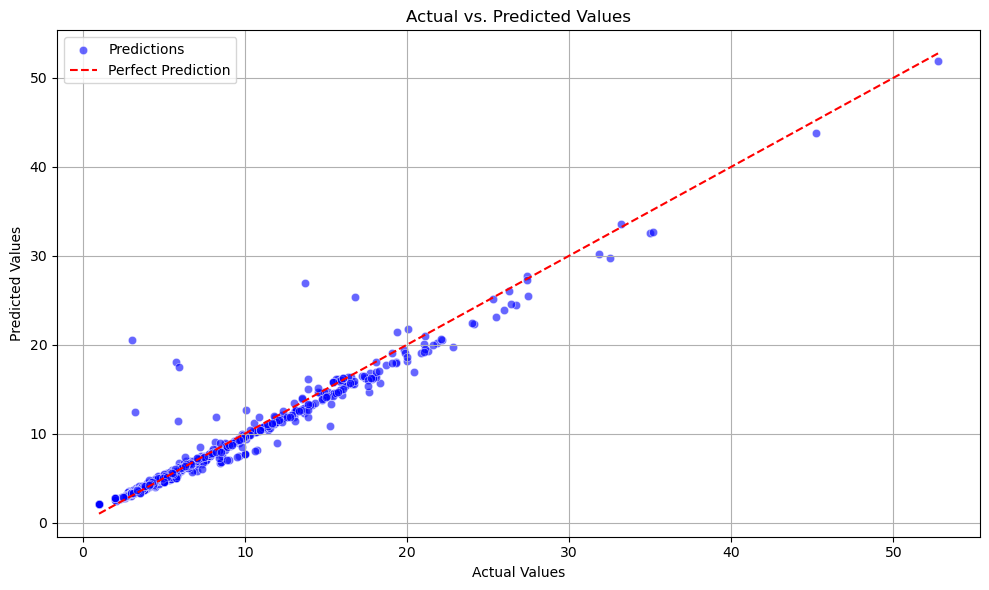

In [68]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, color="blue", label="Predictions")

# Reference line for perfect predictions
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         linestyle='--', color='red', label='Perfect Prediction')

plt.title("Actual vs. Predicted Values")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()